<a href="https://colab.research.google.com/github/danlig94/data_science/blob/master/ML/Sklearn08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
sns.set()

In [6]:
digits = datasets.load_digits()
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [7]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [9]:
images = digits.images
labels = digits.target
images.shape

(1797, 8, 8)

In [10]:
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

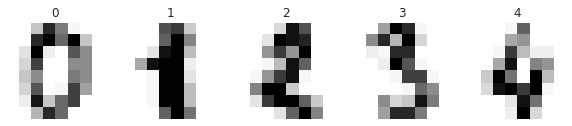

In [30]:
ran = 5
plt.figure(figsize=(10, 10))
for i in range(ran):
  plt.subplot(1, ran, i+1)
  plt.imshow(images[i], cmap='Greys')
  plt.axis('off')
  plt.title(labels[i])

In [51]:
import numpy as np
x = np.random.randint(255, size=(30, 40))
x

array([[253,  15, 128, ...,  97, 190, 176],
       [ 21,  49, 201, ..., 249,  71, 135],
       [ 95,  39, 103, ..., 114,  56,  74],
       ...,
       [240,  53, 141, ..., 215,  87, 173],
       [ 33,  83,  17, ..., 194,  30, 193],
       [ 25, 160, 116, ...,  43, 204, 137]])

(-0.5, 39.5, 29.5, -0.5)

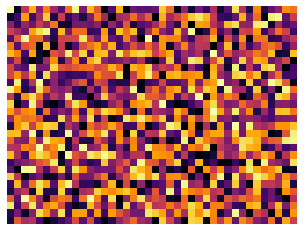

In [54]:
plt.imshow(x, cmap='inferno')
plt.axis('off')

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels)
x_train.shape

(1347, 8, 8)

In [62]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_test.shape)
print(x_train.shape)

(450, 64)
(1347, 64)


In [64]:
x_train[0]

array([ 0.,  0.,  1.,  8.,  8.,  9., 12.,  7.,  0.,  0.,  8., 16., 12.,
       13., 16.,  5.,  0.,  0., 11.,  6.,  0.,  8., 11.,  0.,  0.,  0.,
       15.,  3.,  1., 15.,  3.,  0.,  0.,  0.,  1.,  0., 10.,  9.,  0.,
        0.,  0.,  0.,  0.,  3., 13.,  1.,  0.,  0.,  0.,  0.,  0., 13.,
        7.,  0.,  0.,  0.,  0.,  0.,  1., 11.,  1.,  0.,  0.,  0.])

In [65]:
from sklearn.svm import SVC

clf = SVC(gamma=0.001)
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [66]:
y_pred = clf.predict(x_test)
y_pred

array([9, 2, 0, 1, 6, 3, 8, 4, 6, 6, 2, 6, 7, 4, 0, 3, 4, 5, 2, 3, 0, 2,
       9, 0, 3, 5, 8, 8, 4, 7, 5, 4, 4, 1, 2, 4, 0, 2, 0, 8, 3, 3, 7, 0,
       5, 7, 9, 7, 3, 4, 5, 6, 0, 1, 6, 3, 5, 8, 7, 8, 4, 6, 7, 4, 5, 2,
       7, 9, 2, 2, 4, 8, 9, 6, 1, 4, 3, 2, 4, 5, 2, 0, 6, 1, 7, 2, 7, 0,
       4, 8, 5, 3, 0, 2, 4, 0, 1, 0, 8, 8, 2, 1, 7, 7, 1, 6, 6, 2, 9, 1,
       9, 3, 1, 5, 9, 7, 7, 5, 2, 1, 5, 8, 8, 8, 3, 6, 9, 5, 7, 6, 0, 3,
       7, 8, 0, 3, 0, 6, 6, 4, 7, 9, 2, 0, 5, 6, 0, 3, 3, 7, 1, 3, 8, 1,
       3, 6, 7, 7, 5, 9, 5, 8, 1, 0, 8, 2, 9, 4, 5, 5, 8, 9, 4, 6, 4, 7,
       3, 2, 5, 5, 4, 5, 5, 9, 1, 8, 8, 0, 5, 0, 3, 4, 0, 5, 9, 6, 3, 2,
       9, 5, 3, 7, 9, 2, 2, 6, 7, 3, 7, 5, 7, 3, 0, 6, 8, 0, 9, 5, 2, 2,
       4, 9, 0, 8, 7, 8, 6, 4, 7, 6, 9, 9, 8, 0, 4, 1, 1, 6, 9, 6, 3, 9,
       8, 3, 7, 9, 4, 0, 0, 3, 5, 6, 9, 7, 6, 2, 0, 9, 5, 0, 4, 5, 4, 8,
       5, 4, 3, 5, 5, 6, 2, 6, 5, 1, 5, 9, 2, 4, 3, 4, 5, 6, 0, 7, 3, 3,
       0, 2, 0, 9, 0, 8, 4, 2, 1, 3, 6, 7, 1, 4, 8,

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        43
           3       0.98      0.98      0.98        47
           4       1.00      0.98      0.99        44
           5       0.98      0.98      0.98        43
           6       1.00      0.98      0.99        47
           7       0.98      1.00      0.99        46
           8       0.95      1.00      0.98        42
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [69]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 42,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 46]])

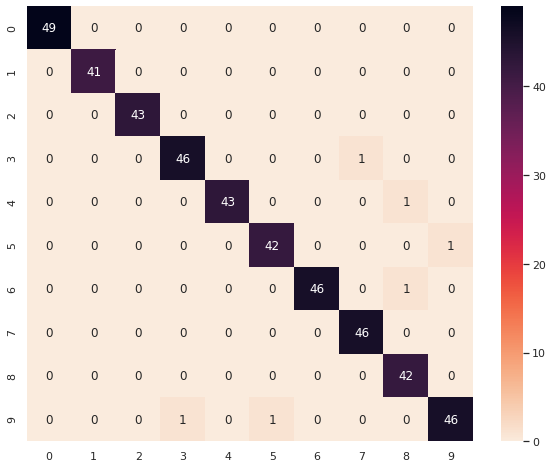

In [78]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, cmap=sns.cm.rocket_r, annot=True)

In [79]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [80]:
results = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
results.head()

,y_true,y_pred
0,9,9
1,2,2
2,0,0
3,1,1
4,6,6


In [83]:
errors = results[results['y_true'] != results['y_pred']]
errors

,y_true,y_pred
6,6,8
55,9,3
67,5,9
122,4,8
272,9,5
347,3,7


In [85]:
errors_idx = list(errors.index)
errors_idx

[6, 55, 67, 122, 272, 347]

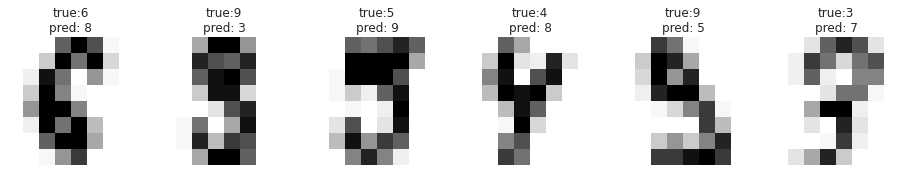

In [104]:
plt.figure(figsize=(16, 10))
for idx, item in enumerate(errors_idx):
  image = x_test[item].reshape(8, 8)
  plt.subplot(1, len(errors_idx), idx+1)
  plt.imshow(image, cmap='Greys')
  plt.axis('OFF')
  plt.title(f'true:{y_test[item]}\npred: {y_pred[item]}')